## Market Segmentation

- This case study involves market segmentation analysis using data originally collected for comparing answer formats in survey research investigating brand image.
- The hypothetical scenario for this case study is that the focus is on McDonald's and the goal is to identify consumer segments with distinct perceptions of the brand.
- A segment that has a positive perception of McDonald’s, frequently eats out, and likes fast food.
- A segment that is currently not fond of McDonald’s, and McDonald's wishes to learn more about market segments which are not their current customers, try to understand which perceptions are responsible for this, and attempt to modify those perceptions.
- The study can help identify market segments with a positive perception of McDonald's that can be further strengthened, or segments with a negative perception where key drivers can be modified.

### Importing the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
df = pd.read_csv("mcdonalds.csv")
df.head()

# DataFrame

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


#### Information of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
# columns in the Dataset
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
# shape of the Dataset

df.shape

(1453, 15)

- These 15 variables may represent different characteristics or attributes of the customers, such as their perception of the food
- Each row represents the customer


#### Statistics of the Age

In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
## checking of null values

df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

### checking the Unique values for each attribute

In [8]:
df.nunique()  

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

#### Distribution of the attributes

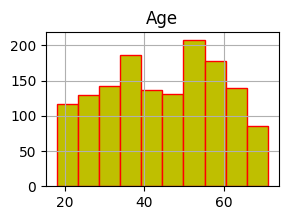

In [9]:
df.hist(figsize = (3,2),color = 'y',edgecolor = 'r')
plt.show()

# Age attribute

#### Distribution of categorical attributes

yummy


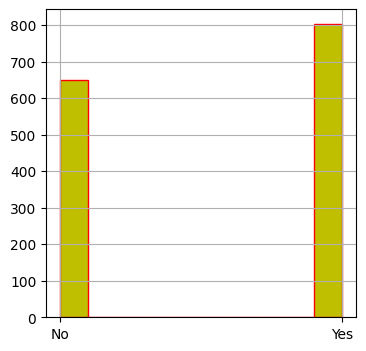

convenient


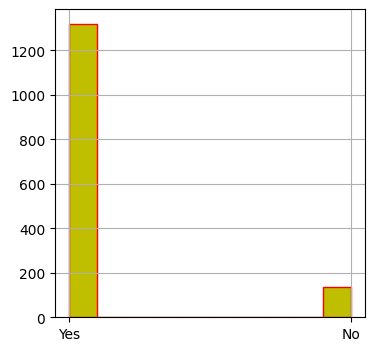

spicy


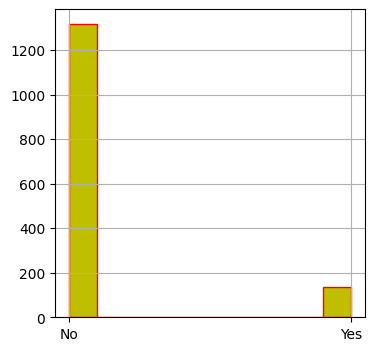

fattening


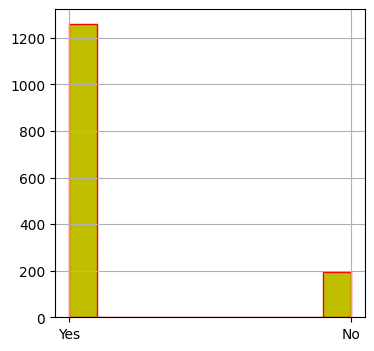

greasy


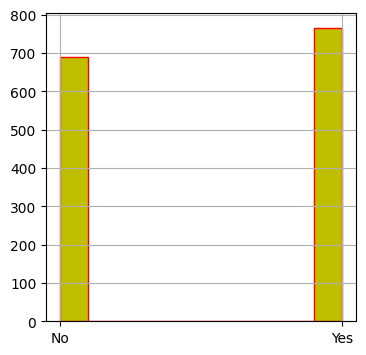

fast


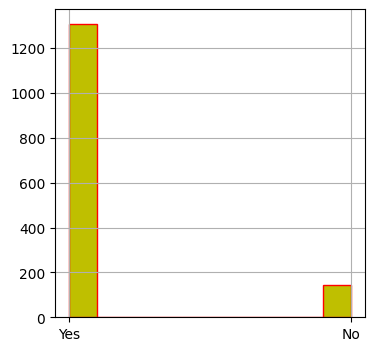

cheap


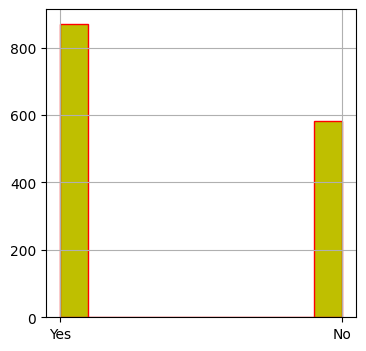

tasty


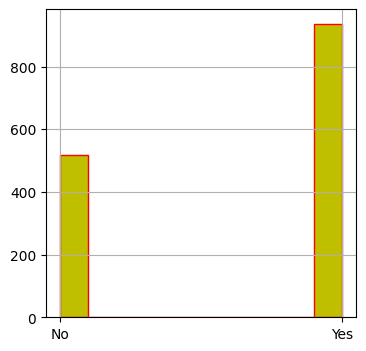

expensive


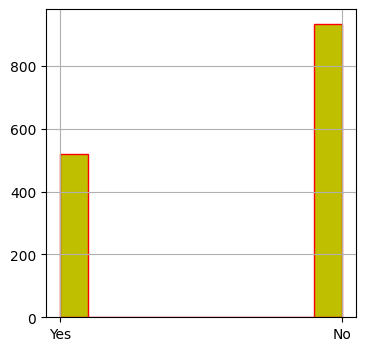

healthy


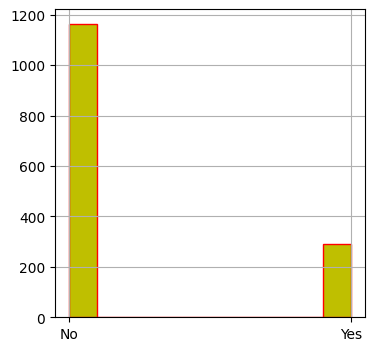

disgusting


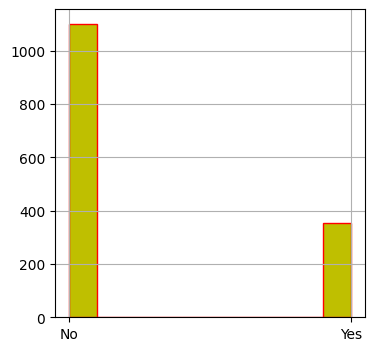

Like


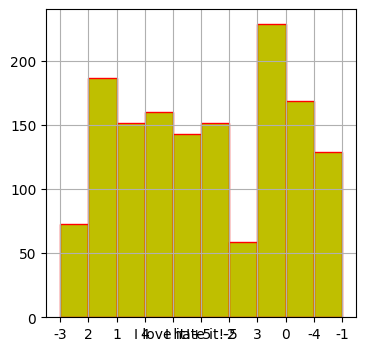

VisitFrequency


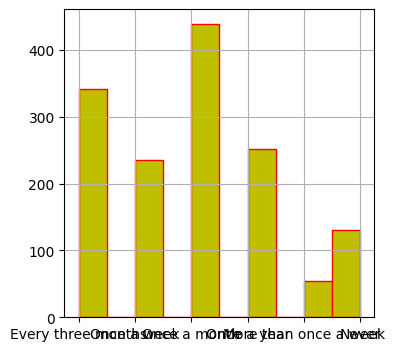

Gender


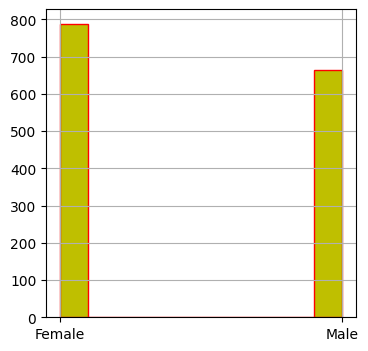

In [10]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        print(i)
        df[i].hist(figsize = (4,4),color = 'y',edgecolor = 'r')
        plt.show()

In [11]:
MD_x = df.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)
arr = np.round(np.mean(MD_x, axis=0), 2)
arr

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [12]:
col_names = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
mapped_vals = dict(zip(col_names, arr))

print(mapped_vals)

{'yummy': 0.55, 'convenient': 0.91, 'spicy': 0.09, 'fattening': 0.87, 'greasy': 0.53, 'fast': 0.9, 'cheap': 0.6, 'tasty': 0.64, 'expensive': 0.36, 'healthy': 0.2, 'disgusting': 0.24}


The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

In [13]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [14]:
# fit PCA model to the data
pca = PCA()
pca.fit(MD_x)
predicted_MD_x = pca.transform(MD_x)[:, :2]

##### PCA is used to transform data into components that indicates how much of the variance in the data is explained by that component. we can use this information to decide how many principal components we want to retain in order to adequately represent the data.

In [15]:
std_dev = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)

for i in range(len(prop_var)):
    print("PC{} std dev = {:.2f}".format(i+1, std_dev[i]))
    print("PC{} proportion of variance = {:.2f}".format(i+1, prop_var[i]))
    print("PC{} cumulative proportion of variance = {:.2f}".format(i+1, cum_var[i]))
    print("")

PC1 std dev = 0.76
PC1 proportion of variance = 0.30
PC1 cumulative proportion of variance = 0.30

PC2 std dev = 0.61
PC2 proportion of variance = 0.19
PC2 cumulative proportion of variance = 0.49

PC3 std dev = 0.50
PC3 proportion of variance = 0.13
PC3 cumulative proportion of variance = 0.63

PC4 std dev = 0.40
PC4 proportion of variance = 0.08
PC4 cumulative proportion of variance = 0.71

PC5 std dev = 0.34
PC5 proportion of variance = 0.06
PC5 cumulative proportion of variance = 0.77

PC6 std dev = 0.31
PC6 proportion of variance = 0.05
PC6 cumulative proportion of variance = 0.82

PC7 std dev = 0.29
PC7 proportion of variance = 0.04
PC7 cumulative proportion of variance = 0.86

PC8 std dev = 0.28
PC8 proportion of variance = 0.04
PC8 cumulative proportion of variance = 0.90

PC9 std dev = 0.27
PC9 proportion of variance = 0.04
PC9 cumulative proportion of variance = 0.94

PC10 std dev = 0.25
PC10 proportion of variance = 0.03
PC10 cumulative proportion of variance = 0.97

PC11 st

#### PCA1, PCA2 has the highest pca std deviation

In [16]:
!pip install flexclust

ERROR: Could not find a version that satisfies the requirement flexclust (from versions: none)
ERROR: No matching distribution found for flexclust

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Get factor loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i) for i in range(1, pca.n_components_+1)], index=col_names)
print(loadings)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

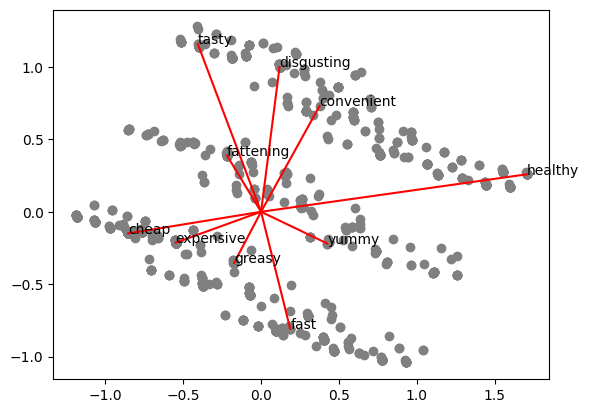

In [18]:
# assuming `X` is your data matrix
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(MD_x)

# obtain the predicted values for the first two principal components
predicted_values = pca.transform(MD_x)[:, :2]

# plot the first two principal components
plt.scatter(predicted_values[:, 0], predicted_values[:, 1], c='grey')

# add variable labels to the plot
variables = np.array(['yummy', 'fattening', 'convenient', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'])
for i, variable in enumerate(variables):
    plt.annotate(variable, (predicted_values[i, 0], predicted_values[i, 1]))
    # add a line for the variable
    plt.plot([0, predicted_values[i, 0]], [0, predicted_values[i, 1]], color='red')

plt.show()


### K-Means

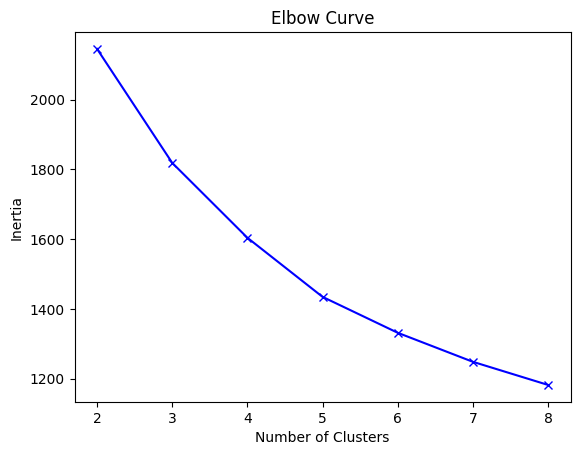

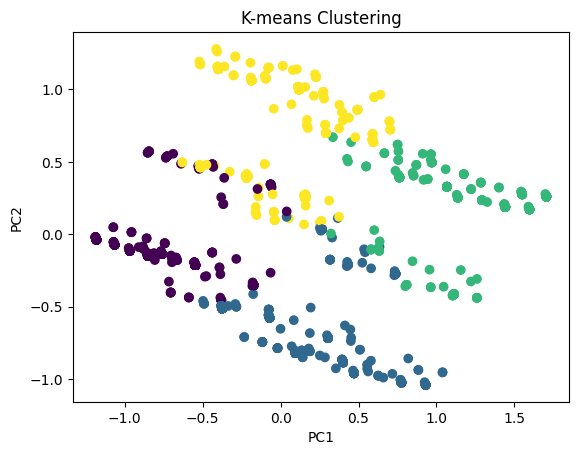

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# set random seed
np.random.seed(1234)

# define the range of number of clusters to consider
n_clusters = range(2, 9)

# fit the k-means model for each value of k
inertias = []
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_model.fit(MD_x)
    inertias.append(kmeans_model.inertia_)

# plot the elbow curve
plt.plot(n_clusters, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# based on the elbow curve, choose the number of clusters to use
n_clusters_chosen = 4

# fit the k-means model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=n_clusters_chosen, n_init=10, random_state=1234)
kmeans_model.fit(MD_x)
cluster_labels = kmeans_model.labels_

# plot the resulting clusters
plt.scatter(predicted_MD_x[:, 0], predicted_MD_x[:, 1], c=kmeans_model.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()


#### Cluster4

C:\Users\tbala\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


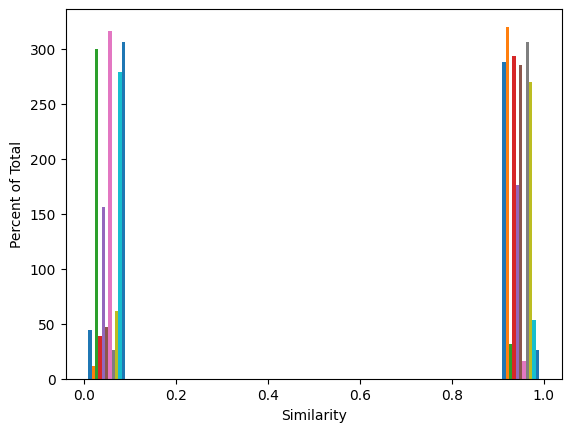

In [20]:
cluster_labels = KMeans(n_clusters=4).fit_predict(MD_x)
values_cluster_4 = MD_x[cluster_labels == 3]

# create histogram of values in fourth cluster
plt.hist(values_cluster_4, range=[0, 1])
plt.xlabel('Similarity')
plt.ylabel('Percent of Total')
plt.show()